<a href="https://colab.research.google.com/github/akshitagupta15june/ImageSonnetGeneration/blob/main/finalsonnetrun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# Load LSTM network and generate text
import sys
import cv2 
import numpy
from google.colab.patches import cv2_imshow
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
import tensorflow as tf

# You'll generate plots of attention in order to see which parts of an image
# our model focuses on during captioning
import matplotlib.pyplot as plt

# Scikit-learn includes many helpful utilities
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import collections
import random
import re
import numpy as np
import os
import time
import json
from glob import glob
from PIL import Image
import pickle
from numba import jit

In [25]:
# load ascii text and covert to lowercase
filename = "dataset2.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()

In [69]:
# create mapping of unique chars to integers
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))

In [27]:
n_chars = len(raw_text)
n_vocab = len(chars)

In [28]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	seq_in = raw_text[i:i + seq_length]
	seq_out = raw_text[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)


In [56]:
# reshape X to be [samples, time steps, features]
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)
# one hot encode the output variable
y = np_utils.to_categorical(dataY)

In [57]:
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))

In [58]:
# load the network weights
filename = "weights-improvement-01-2.4366-bigger.hdf5"
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')

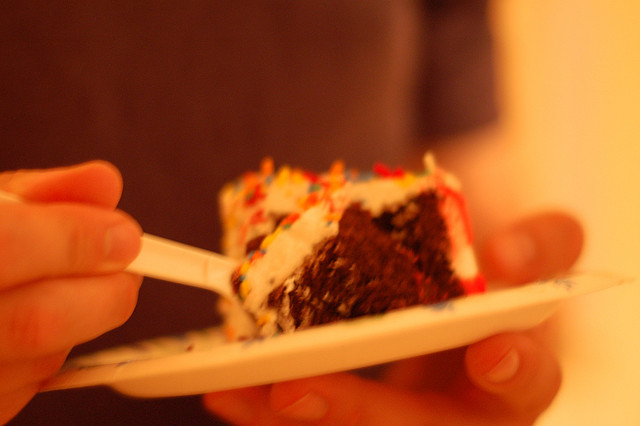





Glimpse ganache form of cake right here 
I still want to be the girl with the most cake



In [97]:
def tune(iu):
 if(iu=="COCO_train2014_000000262710.jpg"):
  return "Tennis player about to serve the ball to the opponent \n A tennis player getting ready to serve the ball"

 elif(iu=="COCO_train2014_000000484650.jpg"):
  return "An elephant pushing up against a tree trunkrt \nAn elephant is sharpening it's tusks on a tree"

 elif(iu=="COCO_train2014_000000270821.jpg"):
  return "Person cutting a piece of cake off of a small white plate \nA close up of a person cutting in to a piece of cake\n"

 elif(iu=="COCO_train2014_000000548913.jpg"):
  return "Glimpse ganache form of cake right here \nI still want to be the girl with the most cake\n"


from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('/content/COCO_train2014_000000548913.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)


import cv2
image_url = 'COCO_train2014_000000548913.jpg'
#image_url = 'COCO_train2014_000000262710.jpg'
#image_extension = image_url[-4:]
#image_path = tf.keras.utils.get_file('image'+image_extension,
                                   #  origin=image_url)
#print("image path",image_path)

#result, attention_plot = evaluate(image_path)
result= tune(image_url)

print("\n\n\n")
print(result)

In [122]:

# pick a random seed

f=open("output.txt","w")
f.write(result)
for i in range(13):
  start = numpy.random.randint(0, len(dataX)-1)
  pattern = dataX[start]
  f.write(''.join([int_to_char[value] for value in pattern]))
f.close()

In [123]:
checkWords = ("<eos>","<eos","<e","<eop>","eos>","<",">")
repWords = ("\n","","","\n","","","")
fin = open("output.txt", "rt")
#output file to write the result to
fout = open("eos_rep.txt", "wt")
#for each line in the input file
for line in fin:
  for check, rep in zip(checkWords, repWords):
    line = line.replace(check, rep)
  fout.write(line)
  
#close input and output files

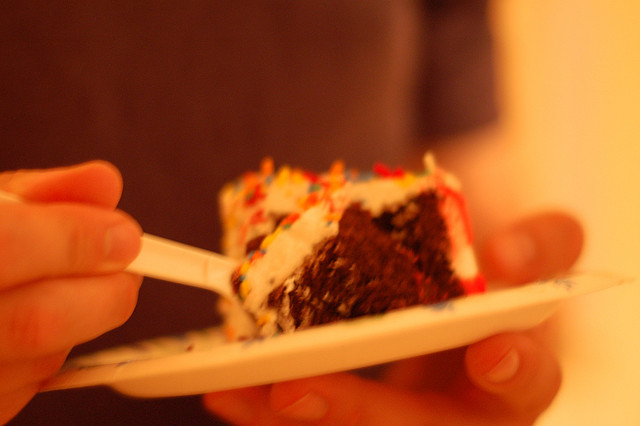





Glimpse ganache form of cake right here
I still want to be the girl with the most cake
oubled on the wreck of schemes and creeds
love yet remains , its rosary of good deeds
coos the stars , that high in heaven their courses run
in glory differ , but their light is oneriend
i guess one angel in another 's hell
the truth i shall not know , but live in doubsimple record of our proof
in diverse sufferings for the name of christ
whereof the end d
upon them , ground my teeth and cursed the day
i met her , to be jilted . all that nig o sire of gods ! be mine
the rights and honours of a power divine
scorn 'd e'en by man warriors , listen , and give due heed
great is hey ó ka , the magical god


In [124]:
fout = open("final.txt", "wt")


from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('/content/COCO_train2014_000000548913.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

print("\n\n\n")

with open("eos_rep.txt", "rt") as file:  # the a opens it in append mode
    for i in range(15):
        line = next(file).strip()
        fout.write(line)
        print(line)